# <small>Le Wagon Tokyo | Data Science Workshop</small><br/>**Data Analysis with Python**
#### Learning the basics of Data Analysis using Python, Numpy and Pandas

<br/>

<table class="qr-code">
    <tr>
        <td><img src="assets/qrcode.png" style="min-width: 150px; max-width: 300px;"/></td>
        <td><h2>https://info.lewagon.com/tokyo-data-analysis</h2></td>
    </tr>
</table>

## Introduction about this notebook

A Jupyter Notebook is a document format that combines the strengths of a word processor, a spreadsheet software and, most importantly, a code environment. This notebook document allows **executable code, nicely formatted text, dynamic tables and charts to live side-by-side**.

### Why not use Excel for Data Science?

![When Excel crashes...](assets/excelcrash.jpg "When Excel crashes...")

Unlike Excel, this notebook makes it easier to:
- **work with large datasets** (try to open [one of these datasets](https://www.who.int/healthinfo/statistics/mortality_rawdata/en/) with 2M+ rows in Excel)
- **combine multiple files** (try to concatenate two of the datasets above in Excel!)
- **pull data from the web/APIs**
- user Python!

### How does this notebook work?

The cell below is a code cell. To run the code within it, first select it then click the play icon on the left, or simply press `[shift] + [enter]`.

In [1]:
print("That is some fancy piece of code!")
print("1 + 1 makes", 1 + 1)

That is some fancy piece of code!
1 + 1 makes 2


You have just executed some Python code! Below the code cell, you should have the following result:
> ```
That is some fancy piece of code!
1 + 1 makes 2
```

Please note that the code in a cell is only executed when you run the cell, which means you can choose to run cells in the notebook in any order that you wish. It means the physical order of where the code appears in the notebook does not necessarily determine the order of when it is run. Because the variables in your coding environment change everytime a cell is run, the same cell may return different results depending on the order of execution.

> **Make sure to run each cell while you go through this notebook.**

If you think you are not getting the expected results and would like to reset your notebook, just click in the toolbar on `Runtime > Restart runtime...`. Then execute each cell in order of appearance in the document, from top to bottom.

And now...

## Let's get started!

The cell below imports Python libraries that we will be using in our project. They allow us to utilize useful functions to process and analyse our data.

Basically every data science notebook will start with a cell like that one. Make sure you run it first!

> **Reminder:**  
> Select the cell and press `[shift] + [enter]` to run it.

In [2]:
import numpy as np                   # Python Math library
import pandas as pd                  # Python Data Analysis library  
%matplotlib inline
from matplotlib import pyplot        # Library to plot charts

### How to find a dataset?

There are a lot of great sources to obtain data on the web. Here are great resources with many datasets to get started: [Kaggle](https://www.kaggle.com/datasets) and this [GitHub repository](https://github.com/awesomedata/awesome-public-datasets)

Today, we will be working with this dataset by Johns Hopkins CSSE ([2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository](https://github.com/CSSEGISandData/COVID-19)) which contains daily updated numbers on the COVID-19 outbreak. This dataset is publicly available on GitHub.

### Importing data from the web

This is a good way to showcase how useful notebooks can be in comparison to a traditional spreadsheet... We can very simply write a few lines of Python code to **automatically download our dataset from the web or APIs**. In this case, we are downloading csv files from a GitHub repository. Even though are updated daily, we can simply re-run the cell to fetch the latest version of the data.

In [3]:
import os, requests

# The csv files we will download from GitHub
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
filenames = [
    "time_series_covid19_confirmed_global.csv",
    "time_series_covid19_deaths_global.csv",
    "time_series_covid19_recovered_global.csv"
]

# Creating a /data directory for our notebook
if not os.path.exists('data'):
    os.mkdir('data')

# Downloading the csv files in /data
for filename in filenames:
    print(f"Downloading {filename}...")
    r = requests.get(url + filename, allow_redirects=True)
    open('data/' + filename, 'wb').write(r.content)
    
print("Download complete.")

Download complete.


## Our first DataFrame

A DataFrame is a pandas object that we can manipulate using pandas functions. Think of it like a code representation of an excel spreadsheet.

Let's create a DataFrame by loading our first CSV file into our notebook! You can do this with the `read_csv()` function.

```python
pd.read_csv(filepath)
```

In [4]:
### TODO ###
# Open "data/time_series_covid19_recovered_global.csv" using pd.read_csv(filepath)

filepath = "data/time_series_covid19_recovered_global.csv"
recovered_df = pd.read_csv(filepath)

Let's see what's in our newly created dataframe by calling the variable `recovered_df`:

In [5]:
### TODO ###
# View what is stored in variable recovered_df

recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Getting a feel for the data

You can get a basic idea about your DataFrame using these functions:
```python
dataframe.shape         # Returns the shape (rows, columns)
dataframe.columns       # Returns the list of columns
dataframe.dtypes        # Returns the datatypes of each column
dataframe.isna().sum()  # Returns missing values in each column 
dataframe.describe()    # Returns descriptive statistics
```

In [6]:
### TODO ###
# Play around and display the shape, columns and datatypes of recovered_df.

#recovered_df.shape         # Returns the shape (rows, columns)
#recovered_df.columns       # Returns the list of columns
recovered_df.dtypes        # Returns the datatypes of each column
#recovered_df.isna().sum()  # Returns missing values in each column 
# recovered_df.describe()    # Returns descriptive statistics

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
4/21/20             int64
Length: 95, dtype: object

Show the first rows using `head()` and the last rows using `tail()`. For example:
```python
dataframe.head()      # Returns the first 5 rows by default
dataframe.tail(20)    # Returns the last 20 rows
```

In [7]:
### TODO ###
# Display the last 10 rows of recovered_df.

recovered_df.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
240,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
241,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,6,6
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,3,3
244,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,1,1,1,1,1,1,3,3,3,3
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the data

### Getting rows

You can use Python's slice syntax to get rows of a DataFrame. For example:
```python
dataframe[5:10]   # Returns rows 5 to 9
dataframe[:20]    # Returns the first 20 rows (0 to 19)
dataframe[::3]    # Returns every third row
```

**Note:** You can also use negative indexes in Python to count from the end of your slice.

In [8]:
### TODO ###
# Display the last 20 rows of the recovered_df DataFrame.

recovered_df[-20:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
230,NaN,Zimbabwe,-20.000000,30.000000,0,0,0,0,0,0,...,0,0,0,1,1,2,2,2,2,2
231,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,58,58,62,63,63,69,69,71,71,71
232,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,1,1,2,2,2,2,2,2
233,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,58,58,66,66,79,84,93,93,93,93
234,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,7,7,7
235,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
236,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3
237,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Getting columns

DataFrames have similarities with dictionaries (objects/hashes). You can retrieve values from one or multiple columns using:

```python
dataframe[['Column Name']]  # Returns a DataFrame object
dataframe['Column Name']    # Returns a Series object (single column)
```

Note the double `[]` to return a DataFrame: **the columns are passed as a list**.

In [9]:
### TODO ###
# Get the 'Province/State' and 'Country/Region' columns.

recovered_df[['Province/State','Country/Region']]

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola
...,...,...
245,Saint Pierre and Miquelon,France
246,NaN,South Sudan
247,NaN,Western Sahara
248,NaN,Sao Tome and Principe


### Getting a cell

You can get the value from a specific cell using `loc[]`:

```python
dataframe.loc[row_indexer, column_indexer]
```

In [10]:
### TODO ###
# Retrieve the latitude of row 71.

recovered_df.loc[71, 'Lat']

24.974

### Filtering rows

#### Boolean indexing

We first start by creating a condition on a column, in order to create a boolean mask. Think of this mask as an array mapping each position of your column with either `True` or `False` depending on the condition.

```python
dataframe["Country"] == "Japan"
```

In [11]:
### TODO ###
# Create a boolean mask for the rows with "China" as the "Country/Region".

mask = recovered_df["Country/Region"] == "China"

We call this a boolean **mask** because we can now apply this mask to our dataframe and it will only return the rows that were marked `True`. The other rows (marked `False`) are now **masked out**.

In [12]:
### TODO ###
# Apply the mask to recovered_df.
# Hint: You can apply a mask using dataframe[mask]

mask = recovered_df["Country/Region"] == "China"
recovered_df[mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
40,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,984,984,984,984,984,984,984,984,984,984
41,Beijing,China,40.1824,116.4142,0,0,1,2,2,2,...,479,484,491,495,503,509,509,510,514,516
42,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,570,570,570,570,570,570,570,570,570,570
43,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,321,325,329,331,333,334,336,339,339,341
44,Gansu,China,37.8099,101.0583,0,0,0,0,0,0,...,135,135,136,136,137,137,137,137,137,137
45,Guangdong,China,23.3417,113.4244,0,2,2,2,2,4,...,1443,1454,1458,1462,1471,1475,1482,1490,1494,1501
46,Guangxi,China,23.8298,108.7881,0,0,0,0,0,0,...,252,252,252,252,252,252,252,252,252,252
47,Guizhou,China,26.8154,106.8748,0,0,0,0,0,0,...,144,144,144,144,144,144,144,145,145,145
48,Hainan,China,19.1959,109.7453,0,0,0,0,0,0,...,162,162,162,162,162,162,162,162,162,162
49,Hebei,China,39.5490,116.1306,0,0,0,0,0,0,...,313,313,314,314,315,316,316,316,317,317


**Note:** You can use `str.contains()` to partially match the content of a cell. For example:
```python
f_mask = recovered_df["Country/Region"].str.contains("F")
recovered_df[f_mask]
# Will return rows from all countries containing "F"
# Start your string with '(?i)' to make the search case insensitive
```
*`Series.str` is used to access the values of the series as strings.*

In [13]:
### TODO ###
# Get the rows of all countries containing the letter "t" (case insensitive).

f_mask = recovered_df['Country/Region'].str.contains("(?i)t")
recovered_df[f_mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,0,0,3,3,3,3,3,3,3,7
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,468,515,559,596,631,666,685,709,737,840
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,59,59,72,72,82,81,88,88,88,88
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,4,4,4,4,4,1379,1379,1379,1379,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.17840,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,1,1,1,1,1,1,3,3,3,3
246,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:** You can use `isin()` to match row values from within a list.
```python
isin_mask = recovered_df["Country/Region"].isin(["Japan", "US"])
recovered_df[isin_mask]
```

In [14]:
### TODO ###
# Create a mask to filter countries from this list: "Australia", "France", "Singapore".

isin_mask = recovered_df["Country/Region"].isin(["Australia", "France", "Singapore"])
recovered_df[isin_mask]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,59,59,72,72,82,81,88,88,88,88
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,1379,1379,1379,1379,1379
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,2,2,6,6,6,9,9,9,9,9
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,372,372,442,442,442,442,738,738,738,738
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,179,179,240,240,279,331,331,331,331,331
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,48,48,53,53,67,67,67,67,67,67
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,926,926,1118,1118,1137,1159,1172,1172,1172,1172
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,216,216,251,251,338,340,340,340,340,340
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,51,51,51,51,51,61,64,64,69,76
100,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,19,19


### Filtering columns

In addition to directly selecting multiple columns, you can also filter specific columns from your dataframe using `filter()`:
```
dataframe.filter(items=['Column Name'])
dataframe.filter(regex="...")
```

In [15]:
### TODO ###
# Display only these columns: "Province/State", "Country/Region", "Lat" and "Long".

recovered_df.filter(items=["Province/State", "Country/Region", "Lat", "Long"])

,Province/State,Country/Region,Lat,Long
0,NaN,Afghanistan,33.000000,65.000000
1,NaN,Albania,41.153300,20.168300
2,NaN,Algeria,28.033900,1.659600
3,NaN,Andorra,42.506300,1.521800
4,NaN,Angola,-11.202700,17.873900
...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900
246,NaN,South Sudan,6.877000,31.307000
247,NaN,Western Sahara,24.215500,-12.885800
248,NaN,Sao Tome and Principe,0.186360,6.613081


In [16]:
### TODO ###
# Display all the date columns using a regular expression.
# Hint: The names of all these columns end with "20".

recovered_df.filter(regex="20$")

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,0,0,0,0,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,0,0,0,0,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,0,0,0,0,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,0,0,0,0,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning up & Formatting the data

### Re-indexing

You can re-index your dataframe using `set_index()`.
```python
dataframe.set_index('Column Name')
```

In [17]:
### TODO ###
# Set the 'Country/Region' column as the index.

recovered_df.set_index('Country/Region')

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.000000,65.000000,0,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,Saint Pierre and Miquelon,46.885200,-56.315900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South Sudan,NaN,6.877000,31.307000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Sahara,NaN,24.215500,-12.885800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:** You can now also filter rows using a RegEx on the index with `.filter(regex="...")`:
```python
recovered_df.set_index('Country/Region').filter(regex="^A", axis='rows')
```

### Remove rows or columns

Remove unused rows/columns using `drop()`.
```python
dataframe.drop(rows, axis='rows')
dataframe.drop(columns, axis='columns')
```

In [18]:
### TODO ###
# Remove the latitude and longitude columns.

recovered_df.drop(['Lat', 'Long'], axis='columns')

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,0,0,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sorting

You can sort your rows using `sort_index()` and `sort_values()`:
```python
dataframe.sort_index(ascending=True)
dataframe.sort_values('Column Name', ascending=True)
```

In [19]:
### TODO ###
# Sort the DataFrame by descending index.

recovered_df.sort_index(ascending=False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345


In [20]:
### TODO ###
# Get the 20 rows with the most recoveries on February 18th, 2020 (= 2/18/20).

recovered_df.sort_values('2/18/20', ascending=False).head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
53,Hubei,China,30.9756,112.2707,28,28,31,32,42,45,...,64281,64338,64363,64402,64435,63487,63494,63507,63511,63514
45,Guangdong,China,23.3417,113.4244,0,2,2,2,2,4,...,1443,1454,1458,1462,1471,1475,1482,1490,1494,1501
72,Zhejiang,China,29.1832,120.0934,0,0,1,1,1,1,...,1238,1239,1242,1244,1244,1246,1246,1247,1249,1251
54,Hunan,China,27.6104,111.7088,0,0,0,0,0,0,...,1014,1014,1014,1014,1014,1014,1015,1015,1015,1015
51,Henan,China,33.8820,113.6140,0,0,0,0,0,0,...,1253,1253,1254,1254,1254,1254,1254,1254,1254,1254
40,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,984,984,984,984,984,984,984,984,984,984
57,Jiangxi,China,27.6140,115.7221,0,0,0,0,0,2,...,936,936,936,936,936,936,936,936,936,936
56,Jiangsu,China,32.9711,119.4550,0,0,0,1,1,1,...,638,638,641,642,642,643,643,643,643,644
42,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,570,570,570,570,570,570,570,570,570,570
64,Shandong,China,36.3427,118.1498,0,0,0,0,0,0,...,757,758,759,761,761,761,765,765,765,765


### Aggregating

You can perform functions on all rows or columns such as `sum()`, `count()` or `average()`. By default, the function aggregates the rows of your DataFrame. You can specify `axis='columns'` as an argument to perform the function over the columns.

Examples:
```python
dataframe.count()
dataframe.sum(axis='columns')
dataframe.average(axis='rows')
```

You can refer to this list of [Numpy's statistics functions](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) for a more exhaustive list.

In [21]:
### TODO ###
# Get the total number of recoveries for each day.

recovered_df.filter(regex="20$").sum(axis='rows')

1/22/20        28
1/23/20        30
1/24/20        36
1/25/20        39
1/26/20        52
            ...  
4/17/20    568343
4/18/20    592319
4/19/20    623903
4/20/20    645738
4/21/20    679819
Length: 91, dtype: int64

### Grouping

To perform grouping you need to do the following steps:
1. **Split** the dataframe using `groupby()`
2. **Apply** an aggregative function (*e.g.* `sum`, `count`, `mean`)

In [22]:
### TODO ###
# Get the total number of recoveries per country for each day.
# Hint: Group your data by country, then sum over the aggregated rows.

recovered_df.drop(['Lat','Long'], axis='columns').groupby('Country/Region').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
Albania,0,0,0,0,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
Algeria,0,0,0,0,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
Andorra,0,0,0,0,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,58,58,62,63,63,69,69,71,71,71
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combining everything

In [23]:
### TODO ###
# Do the following on the recovered_df DataFrame:
#   1. remove the 'Province/State', 'Lat' and 'Long' columns
#   2. group the rows by country
#   3. sum over all the aggregated rows
#   4. sort the values by decreasing number of recoveries on February 18th, 2020
#   5. only keep the first 20 rows

recovered_df.drop(['Province/State', 'Lat', 'Long'], axis='columns').groupby('Country/Region').sum().sort_values('2/18/20', ascending=False).head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,28,30,36,39,49,58,101,120,135,214,...,77956,78039,78200,78311,78401,77552,77614,77690,77745,77799
Singapore,0,0,0,0,0,0,0,0,0,0,...,560,586,611,652,683,708,740,768,801,839
Thailand,0,0,0,0,2,2,5,5,5,5,...,1218,1288,1405,1497,1593,1689,1787,1928,1999,2108
Japan,0,0,0,0,1,1,1,1,1,1,...,762,784,799,853,901,935,1069,1159,1159,1239
Malaysia,0,0,0,0,0,0,0,0,0,0,...,2108,2276,2478,2647,2766,2967,3102,3197,3295,3349
Germany,0,0,0,0,0,0,0,0,0,0,...,60300,64300,68200,72600,77000,83114,85400,88000,91500,95200
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,7368,7447,7534,7616,7757,7829,7937,8042,8114,8213
Australia,0,0,0,0,0,0,0,0,2,2,...,1806,1806,2186,2186,2355,3808,4124,4124,4124,4124
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,626,304,323,368,375,394,414,436,446,638


## Plot charts

We can easily plot charts using `plot()`. By default, a line chart will be plotted, but you can specify the chart type using `kind='bar'` for example.

### Recoveries outside of Mainland China

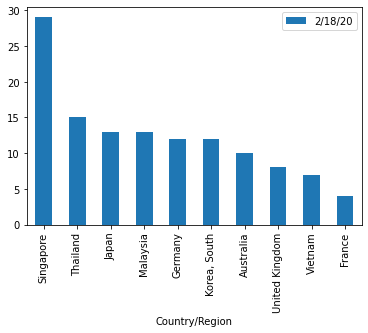

In [24]:
# Preparing the format of our data to be plotted
plot_data = recovered_df.groupby('Country/Region') \
            .sum() \
            [['2/18/20']] \
            .sort_values('2/18/20', ascending=False) \
            .drop('China') \
            .head(10) \

# Plotting our bar chart
plot_data.plot(kind='bar')

### Recoveries over time

Let's plot the total worldwide number of recoveries over time. We will also plot the number of deaths over time on the same chart.

#### Using functions

We can define functions within our notebook, in order to avoid repeating ourselves when pre-processing our datasets. In this specific instance, we want to plot two separate datasets (`recovered` and `deaths`). The CSVs have the same structure, so we can easily write a function to pre-process our data to be plotted.

In [25]:
def prepare(data):
    return data.drop(["Province/State", "Lat", "Long"], axis=1) \
               .set_index('Country/Region') \
               .sum()

# prepare(recovered_df)

To plot multiple series on the same chart, we use `pyplot.plot()` from the `matplotlib` library.

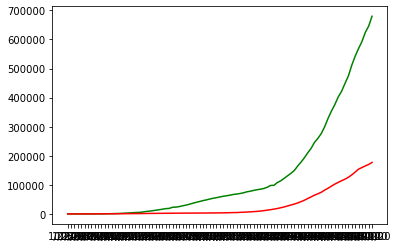

In [26]:
# Loading our deaths dataset
deaths_df = pd.read_csv("data/time_series_covid19_deaths_global.csv")

# Plotting our charts
pyplot.plot(prepare(recovered_df), color='g')
pyplot.plot(prepare(deaths_df), color='r')

# Now, your turn...
Pick a topic you love, find one or more related datasets and practice what you've just learned!

<br/>

### **<center>Thank you!</center>**

| <img src="assets/lewagon.png" style="width: 2em;"></i> | lewagon.com/tokyo |
| --- | :--- |
| <i class="fa fa-github fa-2x"></i> | github.com/trouni |
| <i class="fa fa-linkedin fa-2x"></i> | linkedin.com/in/trouni |